In [1]:
from frbpa.plotting import make_phase_plot

/lustre/aoc/observers/nm-10222/anaconda3/envs/temp/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


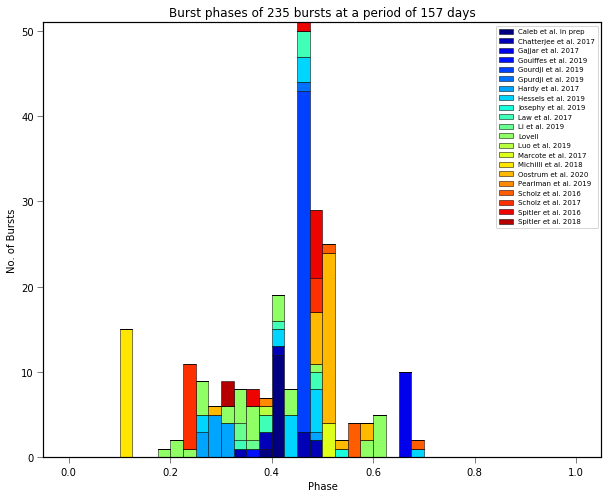

In [2]:
make_phase_plot('121102_data.json', 157, 58200, show=True)

## Old code

In [3]:
import numpy as np
import pylab as plt
%matplotlib inline
import json
from frbpa.utils import get_phase

In [4]:
with open('121102_data.json', 'r') as f:
    r1_data = json.load(f)
burst_dict = r1_data['bursts']

all_bursts = []
for k in burst_dict.keys():
    all_bursts += burst_dict[k]

In [5]:
period = 157

In [6]:
l = []
for k in burst_dict:
    l.append(get_phase(np.array(burst_dict[k]), period, ref_mjd=58200))

In [7]:
refphases = np.linspace(0,1,1000)
_, bin_edges = np.histogram(refphases, bins=40)

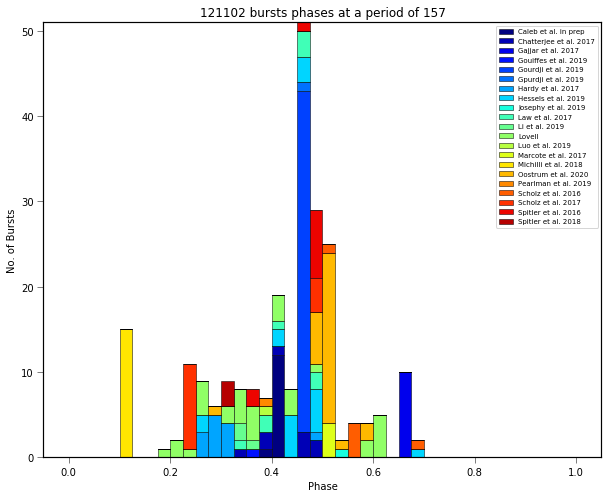

In [8]:
names = burst_dict.keys()
NUM_COLORS = len(names)
plt.figure(figsize=(10,8))
cm = plt.get_cmap('jet')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
_ = plt.hist(l, bins=bin_edges, stacked=True, density=False, label=names, edgecolor='black', 
             linewidth=0.5, color=colors)
plt.xlabel('Phase')
plt.ylabel('No. of Bursts')
plt.title(f'121102 bursts phases at a period of {period}')
plt.legend()